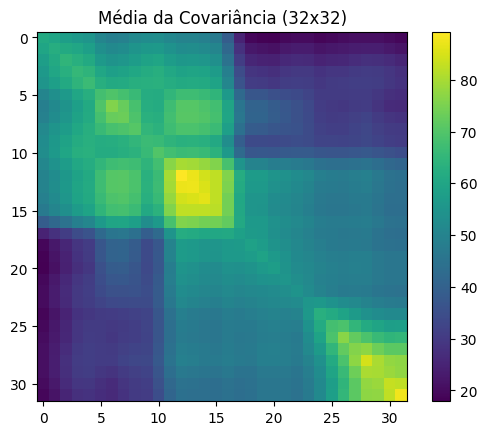

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Função para calcular a covariância de uma imagem
def calcular_covariancia(imagem):
    # Converter a imagem para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    
    # Selecionar a região de 32x32 pixels no centro da imagem
    centro_x = imagem_cinza.shape[1] // 2
    centro_y = imagem_cinza.shape[0] // 2
    regiao = imagem_cinza[centro_y - 16 : centro_y + 16, centro_x - 16 : centro_x + 16]
    
    # Calcular a covariância da região
    cov = np.cov(regiao)
    
    return cov

covariancias = []

imagens = []
img = glob.glob('./zed_div/*.png')
img = img[:25]

for image_path in img:
    imagem = cv2.imread(image_path)
    imagens.append(imagem)

for imagem in imagens:
    cov = calcular_covariancia(imagem)
    covariancias.append(cov)

media_covariancia = np.mean(covariancias, axis=0)

plt.imshow(media_covariancia, cmap='viridis', interpolation='nearest')
plt.title('Média da Covariância (32x32)')
plt.colorbar()
plt.show()